In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn

import os

from env import user, host, password
#from wrangle import get_connection, new_zillow_data, get_zillow_data, remove_outliers
import wrangle

# 1 <br>
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [3]:
df.shape

(2084926, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084926 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area_sqft   float64
 3   tax_value   float64
 4   year_built  object 
 5   tax_amount  float64
 6   fips        object 
dtypes: float64(5), object(2)
memory usage: 127.3+ MB


In [5]:
df.describe().T    

,count,mean,std,min,25%,50%,75%,max
bedrooms,2084926.0,3.288043,0.819514,2.00,3.0000,3.00,4.0000,5.00
bathrooms,2084926.0,2.220187,0.917704,0.00,2.0000,2.00,3.0000,20.00
area_sqft,2084751.0,1838.194905,1087.866122,1.00,1263.0000,1620.00,2184.0000,952576.00
tax_value,2084824.0,446216.057986,566938.973646,1.00,189623.0000,327430.00,530000.0000,71067500.00
tax_amount,2082648.0,5449.443287,6487.574928,16.48,2550.0075,4103.12,6361.1325,824166.91


In [6]:
train, validate, test = wrangle.wrangle_split(df)
train.shape, validate.shape, test.shape

((1459448, 7), (625478, 7), (416986, 7))

In [7]:
train.head()

,bedrooms,bathrooms,area_sqft,tax_value,year_built,tax_amount,fips
1979346,4.0,2.5,2068.0,492072.0,1989.0,5812.96,6059.0
1948908,4.0,2.5,1950.0,142946.0,1977.0,1605.92,6111.0
1606731,4.0,2.0,1713.0,290100.0,1994.0,4225.23,6037.0
1408008,3.0,1.5,1458.0,456000.0,1955.0,5285.24,6059.0
292925,2.0,2.0,971.0,202309.0,1984.0,2932.34,6037.0


# Min-Max Scaling

In [ ]:
# Create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the object
# Scalers should only be fit to train to prevent data leakage
scaler.fit(train)

# Use the object
# the same object that was fitted to train can be used on validate and test
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

# Plot the original and scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

# 2 <br>
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [ ]:
# Scale with inverse transformation
train_inverse = scaler.inverse_transform(train)

# Plot the original and scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_inverse, bins=25, ec='black')
plt.title('Inverse Scaled')

# 3 <br>
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [ ]:
# Create the object
qt = sklearn.preprocessing.QuantileTransformer(n_quantiles=10, output_distribution='normal', random_state=0)

# fit_transform method does both fit and transform steps
qt.fit_transform(train)

In [ ]:
train_quantile = qt.transform(train)

# Plot the original and scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_quantile, bins=25, ec='black')
plt.title('Quantile Scaled')

# 4 <br>
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [ ]:
# Create the object
# Ommiting the output_distribution argument for the function
qt = sklearn.preprocessing.QuantileTransformer(n_quantiles=10, random_state=0)

# fit_transform method does both fit and transform steps
qt.fit_transform(train)

train_quantile = qt.transform(train)

# Plot the original and scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_quantile, bins=25, ec='black')
plt.title('Quantile Scaled')

Setting the ouput_distribution argument to normal will transform the data into a normal distribution.

# 5 <br>
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
# Writing practice function in notebook so that I can test it more easily
# I chose to use Min-Max scaler because it preserves the shape of the data

#def scale_zillow(train, test, validate):
    # Create the object
#    scaler = sklearn.preprocessing.MinMaxScaler()

    # Fit the object
    # Scalers should only be fit to train to prevent data leakage
#    scaler.fit(train)

    # Use the object
    # the same object that was fitted to train can be used on validate and test
#    train_scaled = scaler.transform(train)
#    validate_scaled = scaler.transform(validate)
#    test_scaled = scaler.transform(test)
    
#    return train_scaled, validate_scaled, test_scaled

Text(0.5, 1.0, 'Scaled')

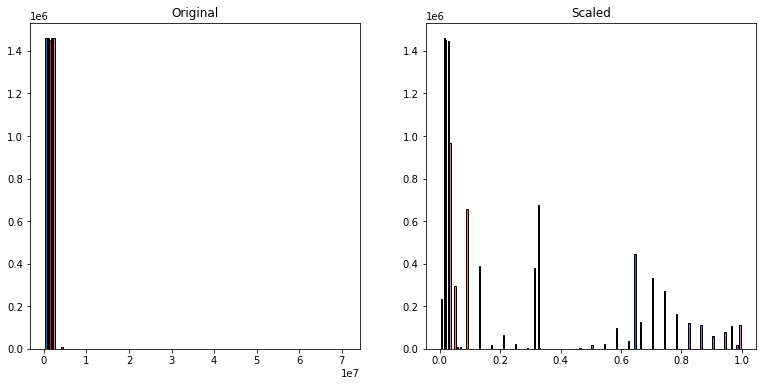

In [8]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_zillow(train, test, validate)

# Plot the original and scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [9]:
# Split the data
train, validate, test = wrangle.wrangle_split(df)
train.shape, validate.shape, test.shape

((1459448, 7), (625478, 7), (416986, 7))